# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.sample(n = 2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los tipos de datos se pueden corregir con el comando astype, en los casos que se requiere valores flotantes o enteros, como es el caso de los valores que se deben agregar por sobrepasar los valores dados de cada plan.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Corregir posibles errores existentes en los tipos de datos del DataFrame

plans['messages_included'] = plans['messages_included'].astype(int)
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(int)
plans['minutes_included'] = plans['minutes_included'].astype(int)
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
plans['usd_per_minute'] = plans['usd_per_minute'].astype(float)
plans['usd_per_message'] = plans['usd_per_message'].astype(float)


print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes
None


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans['GB_per_month_included'] = np.ceil(plans['mb_per_month_included'] / 1024)
plans
# ceil() sirve para redondear siempre hacia el número superior

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,GB_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.sample(n = 10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,NaN
243,1243,Isaias,Compton,71,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-11,surf,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaN
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,NaN
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,NaN
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los tipos de datos se pueden corregir con el comando astype, en los casos que se requiere valores flotantes o enteros. También se debe poner los datos de fechas en formato datetime para que no surjan problemas mas adelante en el proyecto. Como punto adicional, se puede agregar columnas para tener como referencia los dias que los usuarios han estado dentro de un plan, la antiguedad de los mismos que se puede categorizar, y los grupos de edad de los usuarios partiendo de la información necesaria que ya tenemos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# Convertir 'reg_date' y 'churn_date' a formato de fecha si están en el CSV
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

# Aseguramos que 'user_id' sea un entero
users['user_id'] = users['user_id'].astype(int)

# Aseguramos que 'age' sea un entero
users['age'] = users['age'].astype(int)

users.sample(n = 5)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
358,1358,Vaughn,Maldonado,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-26,surf,2018-10-22
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,NaT
134,1134,Shannon,Nichols,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-03,surf,NaT
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
159,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Añadir factor adicional: Duración de la suscripción (en días)
users['subscription_duration'] = (users['churn_date'].fillna(pd.Timestamp("now")) - users['reg_date']).dt.days

# Añadir factor adicional: Estado de suscripción
users['subscription_status'] = users['churn_date'].apply(lambda x: 'Active' if pd.isna(x) else 'Churned')

# Añadir factor adicional: Grupos de edad
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

users['age_group'] = users['age'].apply(categorize_age)

# Añadir factor adicional: Antigüedad del usuario (categorías basadas en la duración de la suscripción)
def categorize_duration(days):
    if days < 180:
        return 'New'
    elif days < 365:
        return 'Intermediate'
    else:
        return 'Veteran'

users['user_tenure'] = users['subscription_duration'].apply(categorize_duration)

# Imprimir la información general del dataframe después de las correcciones y adiciones
print("Información general del dataframe de usuarios después de las correcciones y adiciones:\n")
users.info()

# Imprimir una muestra aleatoria de los datos del dataframe de usuarios
print("\nMuestra de los datos del dataframe de usuarios después de las correcciones y adiciones:\n")
users.sample(n =  5)  


Información general del dataframe de usuarios después de las correcciones y adiciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   first_name             500 non-null    object        
 2   last_name              500 non-null    object        
 3   age                    500 non-null    int64         
 4   city                   500 non-null    object        
 5   reg_date               500 non-null    datetime64[ns]
 6   plan                   500 non-null    object        
 7   churn_date             34 non-null     datetime64[ns]
 8   subscription_duration  500 non-null    int64         
 9   subscription_status    500 non-null    object        
 10  age_group              500 non-null    object        
 11  user_tenure            500 non-null

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration,subscription_status,age_group,user_tenure
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaT,2357,Active,Adult,Veteran
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaT,2359,Active,Young,Veteran
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaT,2177,Active,Adult,Veteran
89,1089,Malena,Kelley,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-03,surf,NaT,2161,Active,Senior,Veteran
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2372,Active,Senior,Veteran


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.sample(n = 5)


,id,user_id,call_date,duration
21129,1077_1096,1077,2018-08-03,7.35
69970,1250_200,1250,2018-12-19,9.36
71984,1256_8,1256,2018-10-23,7.25
75465,1267_187,1267,2018-12-22,12.74
107568,1382_195,1382,2018-08-27,16.51


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los tipos de datos se pueden corregir con el comando astype, en los casos que se requiere valores flotantes o enteros. También se debe poner los datos de fechas en formato datetime para que no surjan problemas mas adelante en el proyecto. Como punto adicional, se puede agregar columnas para tener como referencia una duración redondeada de las llamadas, y las fechas por dia y por mes que pueden ser útiles mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Convertir 'call_date' a formato de fecha
calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')

# Asegurarnos de que 'duration' sea un valor numérico y manejar valores nulos
calls['duration'] = pd.to_numeric(calls['duration'], errors='coerce')

# Asegurarnos de que 'user_id' y 'id' sean enteros
calls['user_id'] = calls['user_id'].astype(int, errors='ignore')
calls['id'] = calls['id'].astype(int, errors='ignore')

# Imprimir la información general del dataframe después de las correcciones
print("Información general del dataframe de llamadas después de las correcciones:\n")
calls.info()

# Imprimir una muestra aleatoria de los datos del dataframe de llamadas
print("\nMuestra de los datos del dataframe de llamadas después de las correcciones:\n")
calls.sample(n = 5)

Información general del dataframe de llamadas después de las correcciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB

Muestra de los datos del dataframe de llamadas después de las correcciones:



,id,user_id,call_date,duration
40783,1150649,1150,2018-12-15,13.12
11916,1052135,1052,2018-11-25,11.24
98859,1354293,1354,2018-11-04,0.00
54417,1196302,1196,2018-03-27,0.45
33156,112410,1124,2018-10-20,8.65


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Añadir factor adicional: Duración de la llamada redondeada
calls['duration_rounded'] = np.ceil(calls['duration']).astype(int)

# Añadir factor adicional: Día de la semana de la llamada
calls['call_day_of_week'] = calls['call_date'].dt.day_name()

# Añadir factor adicional: Mes de la llamada
calls['month'] = calls['call_date'].dt.month_name()

# Imprimir la información general del dataframe después de las correcciones y adiciones
print("Información general del dataframe de llamadas después de las correcciones y adiciones:\n")
calls.info()

# Imprimir una muestra aleatoria de los datos del dataframe de llamadas
print("\nMuestra de los datos del dataframe de llamadas después de las correcciones y adiciones:\n")
calls.sample(n = 5)

Información general del dataframe de llamadas después de las correcciones y adiciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  int64         
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  int64         
 5   call_day_of_week  137735 non-null  object        
 6   month             137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 7.4+ MB

Muestra de los datos del dataframe de llamadas después de las correcciones y adiciones:



,id,user_id,call_date,duration,duration_rounded,call_day_of_week,month
66084,1239167,1239,2018-10-28,9.48,10,Sunday,October
128363,1460502,1460,2018-07-12,9.72,10,Thursday,July
55085,119735,1197,2018-12-26,4.58,5,Wednesday,December
98860,1354295,1354,2018-11-27,2.16,3,Tuesday,November
41120,1151298,1151,2018-12-03,0.91,1,Monday,December


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages.sample(n = 5)


,id,user_id,message_date
46719,1318_109,1318,2018-12-27
56251,1355_368,1355,2018-10-28
16635,1111_131,1111,2018-09-26
36321,1241_125,1241,2018-11-04
48494,1326_31,1326,2018-10-25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los tipos de datos se pueden corregir con el comando astype, en los casos que se requiere valores flotantes o enteros. También se debe poner los datos de fechas en formato datetime para que no surjan problemas mas adelante en el proyecto. Como punto adicional, se puede agregar columnas para tener como referencia las fechas por dia y por mes en los que se enviaron mensajes que pueden ser útiles mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Convertir 'message_date' a formato de fecha
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

# Asegurarnos de que 'user_id' y 'id' sean enteros
messages['user_id'] = messages['user_id'].astype(int, errors='ignore')
messages['id'] = messages['id'].astype(int, errors='ignore')

# Imprimir la información general del dataframe después de las correcciones
print("Información general del dataframe de mensajes después de las correcciones:\n")
messages.info()

# Imprimir una muestra aleatoria de los datos del dataframe de mensajes
print("\nMuestra de los datos del dataframe de mensajes después de las correcciones:\n")
messages.sample(n = 5)

Información general del dataframe de mensajes después de las correcciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB

Muestra de los datos del dataframe de mensajes después de las correcciones:



,id,user_id,message_date
5747,1054114,1054,2018-12-27
34958,122348,1223,2018-08-27
29266,117962,1179,2018-09-15
49141,132899,1328,2018-07-12
37862,1250115,1250,2018-12-16


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] Revisar message hour

In [18]:
# Añadir factor adicional: Día de la semana del mensaje
messages['message_day_of_week'] = messages['message_date'].dt.day_name()

# Añadir factor adicional: Mes del mensaje
messages['month'] = messages['message_date'].dt.month_name()

# Imprimir la información general del dataframe después de las correcciones y adiciones
print("Información general del dataframe de mensajes después de las correcciones y adiciones:\n")
messages.info()

# Imprimir una muestra aleatoria de los datos del dataframe de mensajes
print("\nMuestra de los datos del dataframe de mensajes después de las correcciones y adiciones:\n")
messages.sample(n = 5)

Información general del dataframe de mensajes después de las correcciones y adiciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   76051 non-null  int64         
 1   user_id              76051 non-null  int64         
 2   message_date         76051 non-null  datetime64[ns]
 3   message_day_of_week  76051 non-null  object        
 4   month                76051 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.9+ MB

Muestra de los datos del dataframe de mensajes después de las correcciones y adiciones:



,id,user_id,message_date,message_day_of_week,month
26003,11596,1159,2018-09-06,Thursday,September
61418,1384543,1384,2018-12-28,Friday,December
32014,1199142,1199,2018-08-21,Tuesday,August
35551,123096,1230,2018-12-30,Sunday,December
39925,1258428,1258,2018-10-31,Wednesday,October


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(n = 5)


,id,user_id,session_date,mb_used
46695,1206_696,1206,2018-12-14,307.99
94820,1441_71,1441,2018-11-22,21.44
66829,1312_52,1312,2018-05-13,255.46
26084,1122_39,1122,2018-07-17,127.42
21444,1099_197,1099,2018-11-30,395.25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los tipos de datos se pueden corregir con el comando astype, en los casos que se requiere valores flotantes o enteros. También se debe poner los datos de fechas en formato datetime para que no surjan problemas mas adelante en el proyecto. Como punto adicional, se puede agregar columnas para tener como referencia las fechas por dia y por mes en los que se usaron megas que pueden ser útiles mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Convertir 'session_date' a formato de fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

# Asegurarnos de que 'user_id' y 'id' sean enteros
internet['user_id'] = internet['user_id'].astype(int, errors='ignore')
internet['id'] = internet['id'].astype(int, errors='ignore')

# Imprimir la información general del dataframe después de las correcciones
print("Información general del dataframe de tráfico de internet después de las correcciones:\n")
internet.info()

# Imprimir una muestra aleatoria de los datos del dataframe de tráfico de internet
print("\nMuestra de los datos del dataframe de tráfico de internet después de las correcciones:\n")
internet.sample(n = 5)

Información general del dataframe de tráfico de internet después de las correcciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB

Muestra de los datos del dataframe de tráfico de internet después de las correcciones:



,id,user_id,session_date,mb_used
98692,1466173,1466,2018-06-04,311.90
84081,139249,1392,2018-10-04,585.53
17573,1079178,1079,2018-09-21,520.66
53346,1240318,1240,2018-07-14,648.22
23334,1106708,1106,2018-08-14,495.51


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# Añadir factor adicional: Día de la semana de la sesión
internet['session_day_of_week'] = internet['session_date'].dt.day_name()

# Añadir factor adicional: Mes de la sesión
internet['month'] = internet['session_date'].dt.month_name()

# Añadir factor adicional: GB redondeados
internet['GB_used'] = np.ceil(internet['mb_used'] / 1024)

# Imprimir la información general del dataframe después de las correcciones y adiciones
print("Información general del dataframe de tráfico de internet después de las correcciones y adiciones:")
print(internet.info())

# Imprimir una muestra aleatoria de los datos del dataframe de tráfico de internet
print("\nMuestra de los datos del dataframe de tráfico de internet después de las correcciones y adiciones:")
print(internet.sample(n = 5))  

Información general del dataframe de tráfico de internet después de las correcciones y adiciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   104825 non-null  int64         
 1   user_id              104825 non-null  int64         
 2   session_date         104825 non-null  datetime64[ns]
 3   mb_used              104825 non-null  float64       
 4   session_day_of_week  104825 non-null  object        
 5   month                104825 non-null  object        
 6   GB_used              104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 5.6+ MB
None

Muestra de los datos del dataframe de tráfico de internet después de las correcciones y adiciones:
             id  user_id session_date  mb_used session_day_of_week      month  \
975

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

# Imprimir la información general del dataframe de tarifas
print("Información general del dataframe de tarifas:\n")
plans.info()

# Imprimir una muestra de los datos del dataframe de tarifas
print("\nMuestra de los datos del dataframe de tarifas:\n")
plans

Información general del dataframe de tarifas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   GB_per_month_included  2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes

Muestra de los datos del dataframe de tarifas:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,GB_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


Surf

- Pago mensual: 20$.

- 500 minutos al mes, 50 SMS y 15 GB de datos.
- Si se exceden los límites del paquete:
    - 1 minuto: 3 centavos.
    - 1 SMS: 3 centavos.
    - 1 GB de datos: 10$.


Ultimate

- Pago mensual: 70$.

- 3000 minutos al mes, 1000 SMS y 30 GB de datos.
- Si se exceden los límites del paquete:
    - 1 minuto: 1 centavo.
    - 1 SMS: 1 centavo.
    - 1 GB de datos: 7$.

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agrupar los datos por usuario y por mes, y contar el número de llamadas
calls_per_user_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name = 'num_calls')

print(calls_per_user_per_month, '\n\n')

# Agrupar los datos por usuario y por mes, y contar el número de llamadas
calls_per_month = calls.groupby(['month', 'user_id'])['user_id'].count().reset_index(name = 'calls_month')
print(calls_per_month)
print('\n\n')

pivot_call = calls.pivot_table(index = ['user_id', 'month'],
                              values = ['duration_rounded'],
                              aggfunc = ['sum','count']).reset_index()

print(pivot_call)



      user_id      month  num_calls
0        1000   December         16
1        1001     August         27
2        1001   December         56
3        1001   November         64
4        1001    October         65
...       ...        ...        ...
2253     1498  September         45
2254     1499   December         65
2255     1499   November         45
2256     1499    October         53
2257     1499  September         41

[2258 rows x 3 columns] 


          month  user_id  calls_month
0         April     1010           90
1         April     1028            7
2         April     1041           60
3         April     1042           44
4         April     1049           30
...         ...      ...          ...
2253  September     1494           67
2254  September     1495           52
2255  September     1496           52
2256  September     1498           45
2257  September     1499           41

[2258 rows x 3 columns]



     user_id      month              sum            coun

In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupar los datos por usuario y por mes, y sumar la duración de las llamadas
minutes_per_user_per_month = calls.groupby(['user_id', 'month'])['duration_rounded'].sum().reset_index(name = 'total_minutes')

print(minutes_per_user_per_month, '\n\n')


# Agrupar los datos por usuario y por mes, y sumar la duración de las llamadas
minutes_per_month = calls.groupby(['month', 'user_id'])['duration_rounded'].sum().reset_index(name = 'total_minutes')

print(minutes_per_month)

      user_id      month  total_minutes
0        1000   December            124
1        1001     August            182
2        1001   December            412
3        1001   November            426
4        1001    October            393
...       ...        ...            ...
2253     1498  September            363
2254     1499   December            496
2255     1499   November            308
2256     1499    October            385
2257     1499  September            346

[2258 rows x 3 columns] 


          month  user_id  total_minutes
0         April     1010            656
1         April     1028             53
2         April     1041            453
3         April     1042            279
4         April     1049            234
...         ...      ...            ...
2253  September     1494            485
2254  September     1495            302
2255  September     1496            414
2256  September     1498            363
2257  September     1499            346

[2258 rows 

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agrupar los datos por usuario y por mes, y contar el número de mensajes enviados
messages_per_user_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name = 'total_messages')

print(messages_per_user_per_month, '\n\n')


# Agrupar los datos por usuario y por mes, y contar el número de mensajes enviados
messages_per_month = messages.groupby(['month', 'user_id'])['id'].count().reset_index(name = 'total_messages')

print(messages_per_month)


      user_id      month  total_messages
0        1000   December              11
1        1001     August              30
2        1001   December              44
3        1001   November              36
4        1001    October              53
...       ...        ...             ...
1801     1496   December              11
1802     1496   November              13
1803     1496    October              18
1804     1496  September              21
1805     1497   December              50

[1806 rows x 3 columns] 


          month  user_id  total_messages
0         April     1028              77
1         April     1054               6
2         April     1059              20
3         April     1061              17
4         April     1062               5
...         ...      ...             ...
1801  September     1489              59
1802  September     1491              50
1803  September     1492              11
1804  September     1494              21
1805  September     1496     

In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agrupar los datos por usuario y por mes, y sumar el volumen de datos usados
internet_per_user_per_month = internet.groupby(['user_id', 'month'])['GB_used'].sum().reset_index(name = 'total_GB')

print(internet_per_user_per_month, '\n\n')

# Agrupar los datos por usuario y por mes, y sumar el volumen de datos usados
internet_volume = internet.groupby(['month', 'user_id'])['GB_used'].sum().reset_index(name = 'total_inter_volume')

print(internet_volume)


      user_id      month  total_GB
0        1000   December       4.0
1        1001     August      21.0
2        1001   December      55.0
3        1001   November      49.0
4        1001    October      50.0
...       ...        ...       ...
2272     1498  September      52.0
2273     1499   December      58.0
2274     1499   November      43.0
2275     1499    October      52.0
2276     1499  September      37.0

[2277 rows x 3 columns] 


          month  user_id  total_inter_volume
0         April     1010                49.0
1         April     1028                73.0
2         April     1041                59.0
3         April     1042                18.0
4         April     1049                13.0
...         ...      ...                 ...
2272  September     1494                42.0
2273  September     1495                62.0
2274  September     1496                42.0
2275  September     1498                52.0
2276  September     1499                37.0

[2277 rows 

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusionar los datos de llamadas y minutos
merged_data = pd.merge(calls_per_user_per_month, minutes_per_user_per_month, on = ['user_id', 'month'], how = 'outer')

# Fusionar los datos de mensajes
merged_data = pd.merge(merged_data, messages_per_user_per_month, on = ['user_id', 'month'], how = 'outer')

# Fusionar los datos de Internet
merged_data = pd.merge(merged_data, internet_per_user_per_month, on = ['user_id', 'month'], how = 'outer')

print(merged_data, '\n\n')


# Fuciona los DataFrame
merged_data_2 = minutes_per_month.merge(calls_per_month, on = ['month', 'user_id'], how = 'outer')
merged_data_2 = merged_data_2.merge(messages_per_month, on = ['month', 'user_id'], how = 'outer')
merged_data_2 = merged_data_2.merge(internet_volume, on = ['month', 'user_id'], how = 'outer')

print(merged_data_2)

      user_id     month  num_calls  total_minutes  total_messages  total_GB
0        1000  December       16.0          124.0            11.0       4.0
1        1001    August       27.0          182.0            30.0      21.0
2        1001  December       56.0          412.0            44.0      55.0
3        1001  November       64.0          426.0            36.0      49.0
4        1001   October       65.0          393.0            53.0      50.0
...       ...       ...        ...            ...             ...       ...
2288     1349   October        NaN            NaN            76.0      27.0
2289     1361       May        NaN            NaN             2.0       7.0
2290     1482   October        NaN            NaN             2.0       NaN
2291     1108  December        NaN            NaN             NaN       2.0
2292     1311      June        NaN            NaN             NaN       7.0

[2293 rows x 6 columns] 


          month  user_id  total_minutes  calls_month  total_

In [29]:
# Añade la información de la tarifa

# Fusionar los datos de usuarios con el dataframe fusionado de actividad de usuario
merged_data = merged_data.merge(users, on = 'user_id', how = 'left')

# # Fusionar con los datos de planes para añadir la información de la tarifa
merged_data = pd.merge(merged_data, plans, left_on='plan', right_on='plan_name', how='left')

# # Eliminar la columna de plan_name para evitar redundancia
merged_data.drop(columns=['plan_name'], inplace=True)

print(merged_data, '\n\n')



# Fusionar los datos de usuarios con el dataframe fusionado de actividad de usuario
merged_data_2 = merged_data_2.merge(users[['user_id', 'plan']], on = 'user_id', how = 'left')

# # Fusionar con la lista users a partir de month y plan sin juntar el resto de la lista
merged_data_2 = merged_data_2.merge(plans, how = 'left', left_on = 'plan', right_on = 'plan_name')

# # Eliminar la columna de plan_name para evitar redundancia
merged_data_2 = merged_data_2.drop('plan_name', axis = 'columns')

print(merged_data_2)



      user_id     month  num_calls  total_minutes  total_messages  total_GB  \
0        1000  December       16.0          124.0            11.0       4.0   
1        1001    August       27.0          182.0            30.0      21.0   
2        1001  December       56.0          412.0            44.0      55.0   
3        1001  November       64.0          426.0            36.0      49.0   
4        1001   October       65.0          393.0            53.0      50.0   
...       ...       ...        ...            ...             ...       ...   
2288     1349   October        NaN            NaN            76.0      27.0   
2289     1361       May        NaN            NaN             2.0       7.0   
2290     1482   October        NaN            NaN             2.0       NaN   
2291     1108  December        NaN            NaN             NaN       2.0   
2292     1311      June        NaN            NaN             NaN       7.0   

      first_name  last_name  age                   

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
# Calcular el ingreso mensual básico
merged_data['basic_income'] = merged_data['usd_monthly_pay']

# Convertimos los valores ausentes para poder realizar las operaciones
merged_data['total_minutes'] = merged_data['total_minutes'].fillna(0)
merged_data['total_messages'] = merged_data['total_messages'].fillna(0)
merged_data['total_GB'] = merged_data['total_GB'].fillna(0)
merged_data['num_calls'] = merged_data['num_calls'].fillna(0)

# Calcular los minutos, mensajes y datos excedentes
merged_data['extra_minutes'] = (merged_data['total_minutes'] - merged_data['minutes_included']).clip(lower=0)
merged_data['extra_messages'] = (merged_data['total_messages'] - merged_data['messages_included']).clip(lower=0)
merged_data['extra_GB'] = (merged_data['total_GB'] - merged_data['GB_per_month_included']).clip(lower=0)

# Calcular los cargos adicionales
merged_data['extra_minutes_income'] = merged_data['extra_minutes'] * merged_data['usd_per_minute']
merged_data['extra_messages_income'] = merged_data['extra_messages'] * merged_data['usd_per_message']
merged_data['extra_GB_income'] = merged_data['extra_GB'] * merged_data['usd_per_gb']

# Calcular el ingreso total mensual
merged_data['total_monthly_income'] = (merged_data['basic_income'] +
                                                  merged_data['extra_minutes_income'] +
                                                  merged_data['extra_messages_income'] +
                                                  merged_data['extra_GB_income'])

print(merged_data)







      user_id     month  num_calls  total_minutes  total_messages  total_GB  \
0        1000  December       16.0          124.0            11.0       4.0   
1        1001    August       27.0          182.0            30.0      21.0   
2        1001  December       56.0          412.0            44.0      55.0   
3        1001  November       64.0          426.0            36.0      49.0   
4        1001   October       65.0          393.0            53.0      50.0   
...       ...       ...        ...            ...             ...       ...   
2288     1349   October        0.0            0.0            76.0      27.0   
2289     1361       May        0.0            0.0             2.0       7.0   
2290     1482   October        0.0            0.0             2.0       0.0   
2291     1108  December        0.0            0.0             0.0       2.0   
2292     1311      June        0.0            0.0             0.0       7.0   

      first_name  last_name  age                   

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan      month    
surf      November     423.325088
ultimate  July         427.067797
          October      450.735849
          June         370.957447
surf      March        330.000000
ultimate  August       421.436620
          May          406.241379
          November     445.196850
surf      January      203.000000
ultimate  December     459.099338
          March        304.250000
surf      December     473.836478
ultimate  April        336.857143
surf      September    414.226804
          February     297.000000
ultimate  February     403.142857
          January      193.500000
surf      April        351.540000
          May          399.584416
          July         449.983471
          October      429.729958
          August       410.111111
ultimate  September    437.511628
surf      June         431.298969
Name: total_minutes, dtype: float64 



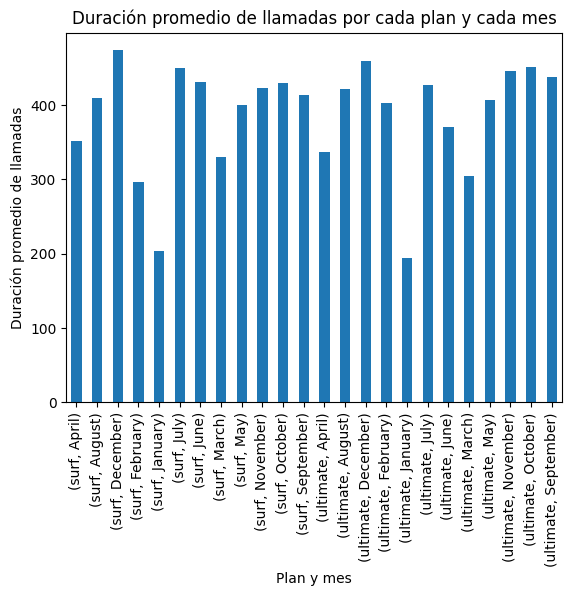

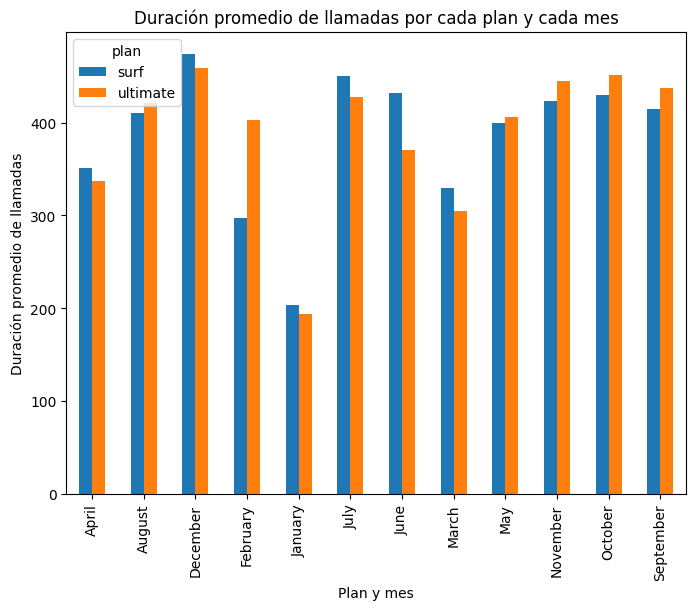

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Calcular la duración promedio de llamadas por plan y por mes
average_call_duration = merged_data.groupby(['plan', 'month'])['total_minutes'].mean()

# Renombrar la columna para mayor claridad
# average_call_duration.rename(columns={'total_minutes': 'average_call_duration'}, inplace=True)
# average_call_duration = average_call_duration.sort_values(by = 'month')

print(average_call_duration.sample(n = 24), '\n')

# Visualizar los datos con un gráfico de barras
average_call_duration.plot(kind = 'bar',
                 title = 'Duración promedio de llamadas por cada plan y cada mes',
                 xlabel = 'Plan y mes', 
                 ylabel = 'Duración promedio de llamadas',
                 x = 'month'
                 )


plt.show()


pivot_average_call_duration = merged_data.pivot_table(index = 'month', 
                                                      columns = 'plan', 
                                                      values = 'total_minutes', 
                                                      aggfunc = 'mean')



pivot_average_call_duration.plot(kind = 'bar',
                 title = 'Duración promedio de llamadas por cada plan y cada mes',
                 xlabel = 'Plan y mes', 
                 ylabel = 'Duración promedio de llamadas',
                                 figsize = (8, 6)
                 )

plt.show()

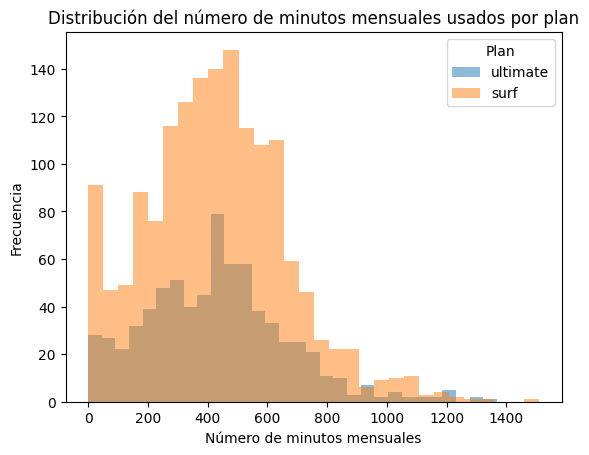

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Filtrar las columnas necesarias
min_per_month = merged_data[['plan', 'total_minutes']]

# Crear un histograma para cada plan en un solo gráfico utilizando el método .hist() de pandas
plans = min_per_month['plan'].unique()
for plan in plans:
    subset = min_per_month[min_per_month['plan'] == plan]
    plt.hist(subset['total_minutes'], bins = 30, alpha = 0.5, label = plan)

# Añadir títulos y etiquetas
plt.title('Distribución del número de minutos mensuales usados por plan')
plt.xlabel('Número de minutos mensuales')
plt.ylabel('Frecuencia')
plt.legend(title = 'Plan')


plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.


# Agrupar por usuario, mes y plan, y calcular la suma de minutos usados
monthly_call_duration = merged_data.groupby(['user_id', 'month', 'plan'])['total_minutes'].sum().reset_index()

# Agrupar por plan y calcular la media y la varianza de la duración mensual de llamadas
plan_call_stats = monthly_call_duration.groupby('plan')['total_minutes'].agg(['mean', 'var'])

# Mostrar los resultados
print(plan_call_stats)


                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


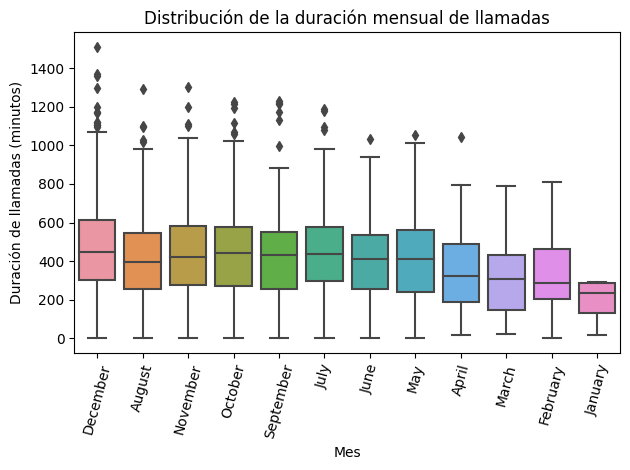

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Crear un diagrama de caja utilizando seaborn
sns.boxplot(x='month', y='total_minutes', data = monthly_call_duration)

# Añadir títulos y etiquetas
plt.title('Distribución de la duración mensual de llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de llamadas (minutos)')
plt.xticks(rotation = 75)


plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

En la mayotia de meses la duración promedio de las llamadas em mayor en el plan surf, también se puede observar que la duración promedio de las llamadas va en aumento desde enero hasta diciembre, siendo este ultimo el mes que mayor duración tienen las llamadas. Obserevando las graficas y las medias, se puede deducir que el plan ultimate tiene los datos mas dispersos, lo que nos da una diferencia de 2 puntos en la media de ambos planes.

### Mensajes

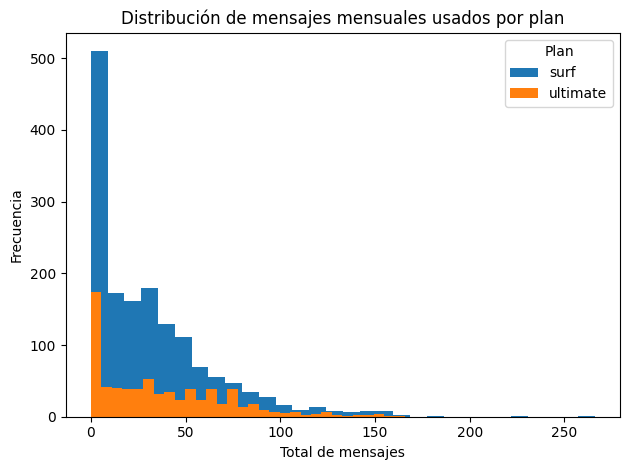

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

message_per_plan = merged_data.groupby('plan')['total_messages']

# Genera el histograma para cada plan
message_per_plan.plot(kind = 'hist', bins = 30)

# Añadir títulos y etiquetas
plt.title('Distribución de mensajes mensuales usados por plan')
plt.xlabel('Total de mensajes')
plt.ylabel('Frecuencia')
plt.legend(title = 'Plan')

plt.tight_layout()
plt.show()


               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744


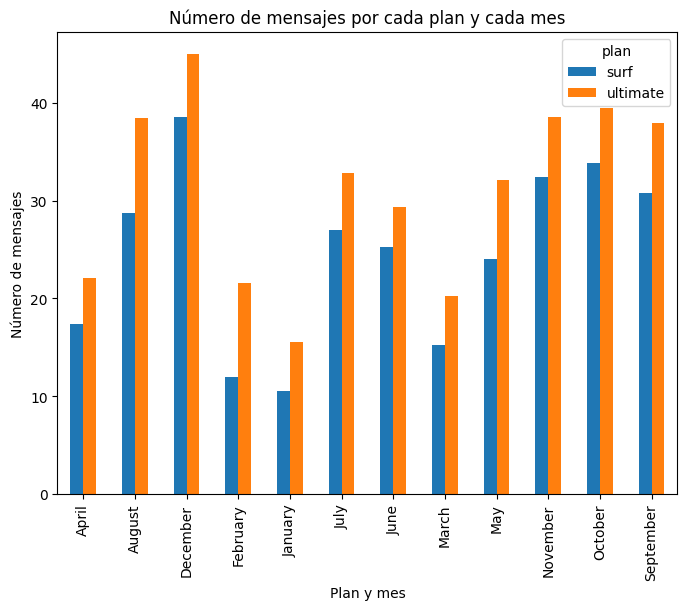

In [36]:
# Calcula la media y la varianza de la cantidad de mensajes enviados por mes.

# Agrupar por usuario, mes y plan, y calcular la suma de mensajes usados
monthly_messages = merged_data.groupby(['user_id', 'month', 'plan'])['total_messages'].sum().reset_index()

# Agrupar por plan y calcular la media y la varianza del numero de mensajes usados
plan_messages_stats = monthly_messages.groupby('plan')['total_messages'].agg(['mean', 'var'])

# Mostrar los resultados
print(plan_messages_stats)


pivot_average_messages = merged_data.pivot_table(index = 'month', 
                                                      columns = 'plan', 
                                                      values = 'total_messages', 
                                                      aggfunc = 'mean')



pivot_average_messages.plot(kind = 'bar',
                 title = 'Número de mensajes por cada plan y cada mes',
                 xlabel = 'Plan y mes', 
                 ylabel = 'Número de mensajes',
                                 figsize = (8, 6)
                 )

plt.show()

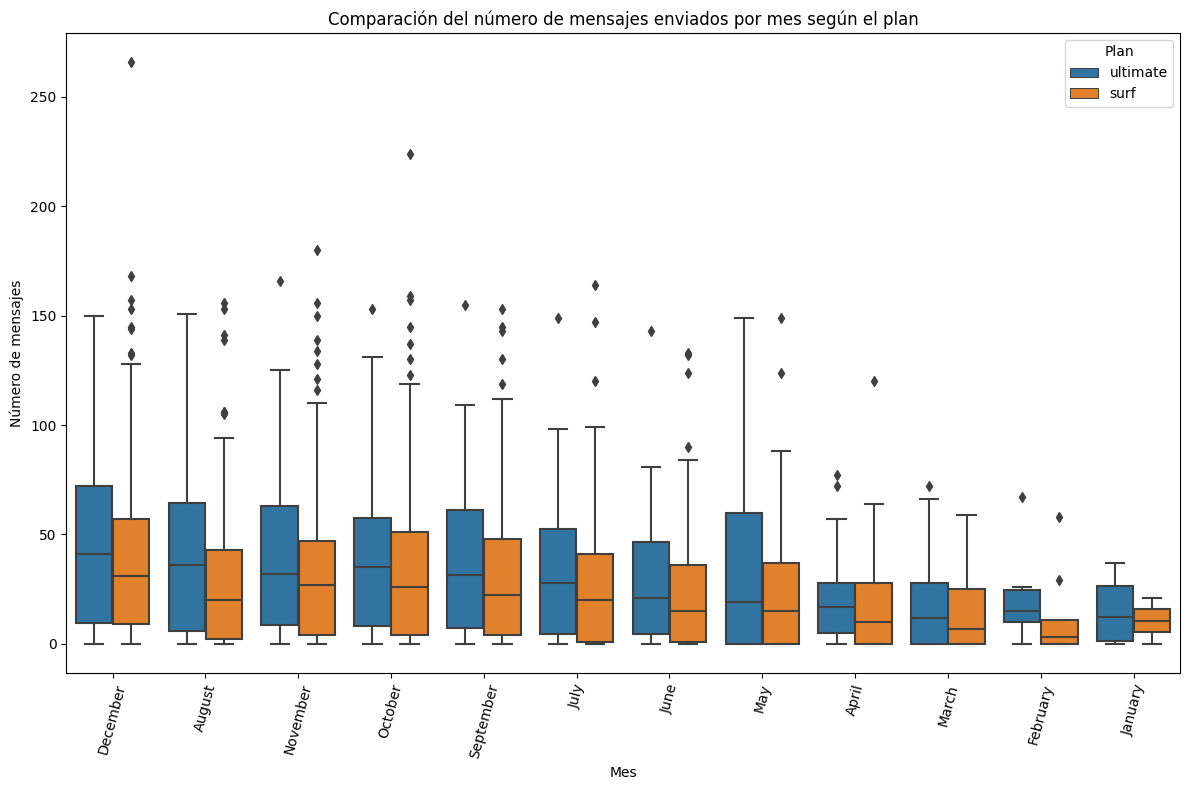

In [37]:
# Agrupar por usuario, mes y plan, y calcular la suma de mensajes enviados
monthly_messages = merged_data.groupby(['user_id', 'month', 'plan'])['total_messages'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un diagrama de caja utilizando seaborn
sns.boxplot(x = 'month', y = 'total_messages', hue = 'plan', data = monthly_messages)

# Añadir títulos y etiquetas
plt.title('Comparación del número de mensajes enviados por mes según el plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.xticks(rotation = 75)
plt.legend(title = 'Plan')


plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

La media de mensajes es mayor en el plan ultimate que en el plan surf y se puede observar que el plan ultimate tiene los datos mas dispersos exeptuando los meses de octubre y diciembre donde tiene un mas datos altamanete dispersos el plan surf. También se puede concluir que diciembre es el mes en el que mas se envían mensajes en ambos planes.

### Internet

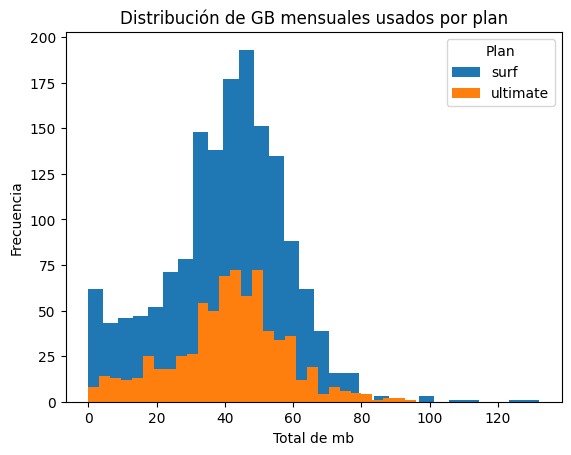

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

GB_per_plan = merged_data.groupby('plan')['total_GB']

# Genera el histograma para cada plan
GB_per_plan.plot(kind = 'hist', bins = 30)

# Añadir títulos y etiquetas
plt.title('Distribución de GB mensuales usados por plan')
plt.xlabel('Total de mb')
plt.ylabel('Frecuencia')
plt.legend(title = 'Plan')



In [39]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupar por usuario, mes y plan, y calcular la suma de megabits usados
monthly_GB_used = merged_data.groupby(['user_id', 'month', 'plan'])['total_GB'].sum().reset_index()

# Agrupar por plan y calcular la media y la varianza del número de megabits usados
plan_internet_stats = monthly_GB_used.groupby('plan')['total_GB'].agg(['mean', 'var'])

# Mostrar los resultados
print(plan_internet_stats)

               mean         var
plan                           
surf      40.140496  318.332030
ultimate  41.080556  273.197952


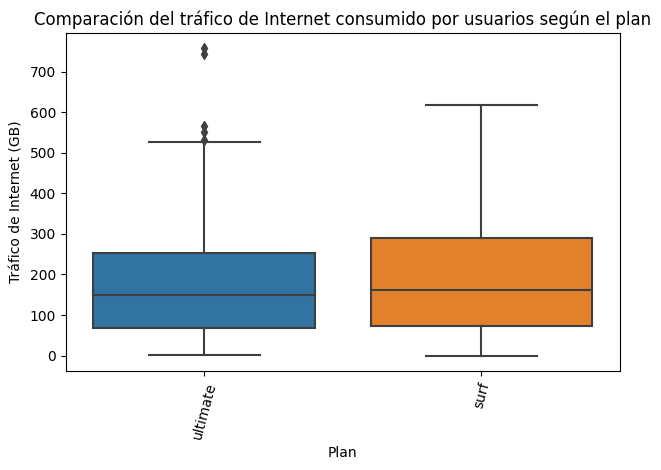

In [40]:
# Agrupar por usuario y plan, y calcular la suma de tráfico de Internet consumido
internet_usage = merged_data.groupby(['user_id', 'plan'])['total_GB'].sum().reset_index()

# Crear un diagrama de caja utilizando seaborn
sns.boxplot(x = 'plan', y = 'total_GB', data = internet_usage)
 
# Añadir títulos y etiquetas
plt.title('Comparación del tráfico de Internet consumido por usuarios según el plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet (GB)')
plt.xticks(rotation = 75)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

La media del plan ultimate varia casi con 1 GB que el plan surf, lo que se puede deber a que el primero tiene algunos datos mucho mas dispersos que el segundo.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [41]:
# Agrupar por plan y calcular estadísticas descriptivas
plan_revenue_stats = merged_data.groupby('plan')['total_monthly_income'].describe()

# Mostrar las estadísticas descriptivas
plan_revenue_stats


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,282.117724,163.239312,20.0,173.51,290.0,390.0,1210.37
ultimate,720.0,166.629167,87.318976,70.0,84.00,154.0,217.0,532.00


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

La media de ingreso es mayor en el plan ultimate debido a que este tiene un coste mas alto hacia los usuarios.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [42]:
merged_data

,user_id,month,num_calls,total_minutes,total_messages,total_GB,first_name,last_name,age,city,...,usd_per_minute,GB_per_month_included,basic_income,extra_minutes,extra_messages,extra_GB,extra_minutes_income,extra_messages_income,extra_GB_income,total_monthly_income
0,1000,December,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,30.0,70.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,August,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,15.0,20.0,0.0,0.0,6.0,0.0,0.00,60.0,80.00
2,1001,December,56.0,412.0,44.0,55.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,15.0,20.0,0.0,0.0,40.0,0.0,0.00,400.0,420.00
3,1001,November,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,15.0,20.0,0.0,0.0,34.0,0.0,0.00,340.0,360.00
4,1001,October,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,15.0,20.0,0.0,3.0,35.0,0.0,0.09,350.0,370.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,October,0.0,0.0,76.0,27.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,0.03,15.0,20.0,0.0,26.0,12.0,0.0,0.78,120.0,140.78
2289,1361,May,0.0,0.0,2.0,7.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",...,0.03,15.0,20.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2290,1482,October,0.0,0.0,2.0,0.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.01,30.0,70.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2291,1108,December,0.0,0.0,0.0,2.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,0.01,30.0,70.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00


In [48]:
# Prueba las hipótesis

# Hipótesis nula = ingreso promedio de los usuarios de las tarifas (surf - ultimate) no son diferentes
# Hipótesis alternativa = ingreso promedio de los usuarios de las tarifas (surf - ultimate) son diferentes

# Filtrar los datos para los planes "Ultimate" y "Surf"
surf_p = merged_data[merged_data['plan'] == 'surf']['total_monthly_income']
ultimate_p = merged_data[merged_data['plan'] == 'ultimate']['total_monthly_income']

# Establecer el nivel de significancia comúnmente utilizado
alpha = 0.05

# Realizar la prueba t de dos muestras
results = st.ttest_ind(surf_p, ultimate_p, equal_var = False)

# Imprimir valor p resultante
print('Valor p resultante:', results.pvalue)

# Comarar el valor p con el umbral
if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')
        
    



Valor p resultante: 2.3248333100718407e-97
Rechazamos la hipótesis nula.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
# Prueba las hipótesis

# Filtrar los datos para el área NY-NJ y otras regiones
NY_NJ = merged_data[merged_data['city'].str.contains('NJ','NY')]

result_NY_NJ = NY_NJ['total_monthly_income']
other_regions = merged_data[~merged_data['city'].str.contains('NJ','NY')]['total_monthly_income']

In [51]:
# Establecer el nivel de significancia comúnmente utilizado
alpha = 0.05

# Realizar la prueba t de dos muestras
results = st.ttest_ind(result_NY_NJ, other_regions, nan_policy = 'omit', equal_var = False)

# Imprimir valor p resultante
print('Valor p resultante:', results.pvalue)

# Comarar el valor p con el umbral
if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')


Valor p resultante: 0.14955945844501195
No rechazamos la hipótesis nula.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Los resultados indican que los usuarios del plan surf tienden a usar mas minutos en las llamadas, una mayoria de mensajes y mas megas de internet, sin embargo, al momento de observar las medias en los tres casos, nos podemos dar cuenta que por algunos datos que sobrepasan los valores de los cuartiles, la media del plan ultimate en todos los casos se mantiene mayor.


Por otra parte, mediante la prueba de las hipótesis, se puede afirmar que que el ingreso promedio de los planes surf - ultimate son diferentes, y también podemos decir que el ingreso promedio de los usuarios NY-NJ no difiere en gran medida de otras regiones.
